In [2]:
import pandas as pd
import numpy as np

In [36]:
countries = ['bangladesh','burundi', 'guatemala', 'haiti', 'nepal', 'rwanda']

for country in countries:
    df = pd.read_csv('D:/Intensive Data/Final Project/DHS_data/%s_education_wealth.csv' %country)
    df2 = df[['HV001', 'wealth_index']]
    df2.columns = ['cluster', 'wealth_index']

    geo_clusters = pd.read_csv('D:/Intensive Data/Final Project/Nightlight_with_Class/Nightlight_%s_class.csv' %country)
    geo_clusters.DHSCLUST = geo_clusters.DHSCLUST.astype(int)
    hh_geo_clusters = geo_clusters[['DHSCLUST', 'max_', 'mean_', 'median_', 'min_', 'std_']]

    # merge wealth index and coordinates
    merged = df2.merge(hh_geo_clusters, left_on='cluster', right_on='DHSCLUST')
    merged.drop('cluster',axis=1, inplace=True)

    cluster_centers = merged.groupby(['DHSCLUST'], as_index = False).median()
    cluster_centers.columns = cluster_centers.columns.str.replace('DHSCLUST','id')
    cluster_centers.columns = cluster_centers.columns.str.replace('wealth_index','wealth')

    cluster_centers.to_csv('D:/Intensive Data/Final Project/DHS wealth/%s_DHS_wealth.csv' %country, index = False)


In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import StratifiedKFold
import pandas as pd
import numpy as np


#input: path for DHS Night light csv file
#output: the mean R2
country = 'rwanda'
nightlight = 'D:/Intensive Data/Final Project/DHS wealth/%s_DHS_wealth.csv' %country

# def night_life_predict(night_life_file):
cluster_centers = pd.read_csv(nightlight)
features = ['mean_','max_','median_','min_','std_']
X = cluster_centers[features]
Y = cluster_centers['wealth']
fold = KFold(len(Y), n_folds=10, shuffle=True, random_state=0)

grid = {'alpha': np.power(10.0, np.arange(-15, 10)), 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}
night_fit = Ridge()
gs = GridSearchCV(night_fit, grid, cv=fold)
gs.fit(X,Y)
meanR2 = gs.best_score_
k = gs.best_params_
# return meanR2
print("The mean R2 value of the 10 fold Linear Regression model is %0.6f" % (meanR2))

clf = Ridge(**k)
clf.fit(X,Y)
Y_pred = clf.predict(X)

# night_life_file = 'DHS_nightlights.csv'
# meanR2 = night_life_predict(night_life_file)

training_score = clf.score(X,Y)
print("The prediction score for %s is %0.6f" %(country, training_score))#
# Your code here
# 71%

The mean R2 value of the 10 fold Linear Regression model is 0.736564
The prediction score for rwanda is 0.772271


In [41]:
# Testing
country_pre = 'rwanda'
nightlight_pre = 'D:/Intensive Data/Final Project/DHS wealth/%s_DHS_wealth.csv' %country_pre
cluster_centers_pre = pd.read_csv(nightlight_pre)
features = ['mean_','max_','median_','min_','std_']
X_pre = cluster_centers_pre[features]
Y_pre = cluster_centers_pre['wealth']
prediction_score = clf.score(X_pre,Y_pre)
print("The prediction score using %s for %s is %0.6f" %(country, country_pre, prediction_score))


The prediction score using rwanda for rwanda is 0.772271


ValueError: x and y must be the same size

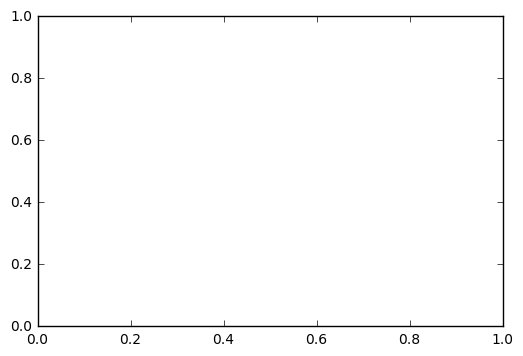

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

def plot_nightlife(xd, yd, order=1, c='r', alpha=1, Rval=False):
    #Calculate best fit
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot
    plt.scatter(X, Y)
    plt.plot(xl, yl)
    plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.3f$' % Rsqr)
    return print('R2 value is %.6f' % (Rsqr))

    # plot points and fit line
plot_nightlife(X_pre, Y_pre, order=1, c='r', alpha=1, Rval=False)
plt.xlabel('Y-pred')
plt.ylabel('Y')
plt.title('Histogram of IQ')


In [39]:
Y = pd.DataFrame(Y_pred)
A = [[Y_pre,Y]]


0     -0.531405
1     -0.409830
2     -0.478115
3     -0.435960
4     -0.449480
5     -0.112650
6     -0.399620
7     -0.195580
8      2.395540
9      0.056460
10    -0.233975
11    -0.458450
12    -0.643445
13    -0.501530
14    -0.490690
15    -0.548980
16    -0.412520
17    -0.419030
18    -0.380060
19    -0.460620
20    -0.266005
21    -0.275315
22     3.141260
23    -0.412800
24    -0.393720
25     0.087560
26    -0.539430
27    -0.493570
28     2.215415
29    -0.385275
         ...   
462   -0.409750
463   -0.316415
464   -0.505760
465   -0.100280
466    0.123710
467   -0.572355
468   -0.426670
469   -0.452280
470   -0.602765
471   -0.078720
472   -0.180235
473   -0.519535
474   -0.413445
475   -0.444630
476   -0.040910
477   -0.396640
478   -0.649635
479   -0.410960
480    2.432185
481   -0.257380
482   -0.369555
483   -0.565495
484   -0.297230
485   -0.144470
486   -0.387670
487   -0.524310
488   -0.388025
489    0.328090
490   -0.278550
491   -0.310160
Name: wealth, dtype: flo